In [11]:
#here we import our libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [25]:
#import data and show in Dataframe apperance
data=pd.read_csv("covid19_cases in Egypt.csv")
df=pd.DataFrame(data)
df

,Date,Day,Month,New Cases,New Death,Total Recoverd,New Recovered,Total Death,Total Cases,Active Cases
0,15/03/2020,Sunday,March,16,0,26,0,2,126,98
1,16/03/2020,Monday,March,40,2,26,0,4,166,136
2,17/03/2020,Tuesday,March,30,2,26,0,6,196,164
3,18/03/2020,Wednesday,March,14,0,28,2,6,210,176
4,19/03/2020,Thursday,March,46,1,28,0,7,256,221
...,...,...,...,...,...,...,...,...,...,...
515,12/08/2021,Thursday,August,95,7,233729,212,16604,285061,34728
516,13/08/2021,Friday,August,97,5,233772,43,16609,285158,34777
517,14/08/2021,Saturday,August,99,6,233881,109,16615,285257,34761
518,15/08/2021,Sunday,August,101,4,234114,233,16619,285358,34625


In [ ]:
#then we realized our aim here
''''
total cases=
  Total Recoverd+
  Total Death+
  Active Cases
''''

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            520 non-null    object
 1   Day             520 non-null    object
 2   Month           520 non-null    object
 3   New Cases       520 non-null    int64 
 4   New Death       520 non-null    int64 
 5   Total Recoverd  520 non-null    int64 
 6   New Recovered   520 non-null    int64 
 7   Total Death     520 non-null    int64 
 8   Total Cases     520 non-null    int64 
 9   Active Cases    520 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 40.8+ KB


In [27]:
data.describe()
#count here means num of rows
#it is very important to give you quick information about your data

,New Cases,New Death,Total Recoverd,New Recovered,Total Death,Total Cases,Active Cases
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,548.759615,31.967308,104719.921154,450.430769,7889.380769,138942.400000,26333.098077
std,430.295939,21.800569,72276.053252,320.413442,5266.588151,88774.725264,18789.573409
min,9.000000,0.000000,26.000000,0.000000,2.000000,126.000000,98.000000
25%,156.500000,13.000000,30818.250000,133.000000,4470.000000,90246.000000,6986.000000
50%,503.500000,28.000000,102657.000000,431.500000,6643.000000,115726.000000,27734.000000
75%,832.500000,48.000000,158030.250000,666.500000,12332.750000,208280.500000,41785.000000
max,1774.000000,97.000000,234250.000000,1716.000000,16625.000000,285465.000000,56636.000000


In [21]:
data.duplicated().sum()
#check duplicates

0

In [73]:
#fix our Date time
df["Date"]=pd.to_datetime(df.Date)
df["Date"]

0     2020-03-15
1     2020-03-16
2     2020-03-17
3     2020-03-18
4     2020-03-19
         ...    
515   2021-12-08
516   2021-08-13
517   2021-08-14
518   2021-08-15
519   2021-08-16
Name: Date, Length: 520, dtype: datetime64[ns]

In [36]:

df.sum()

Day               SundayMondayTuesdayWednesdayThursdayFridaySatu...
Month             MarchMarchMarchMarchMarchMarchMarchMarchMarchM...
New Cases                                                    285355
New Death                                                     16623
Total Recoverd                                             54454359
New Recovered                                                234224
Total Death                                                 4102478
Total Cases                                                72250048
Active Cases                                               13693211
dtype: object

In [51]:
sum_data={'Total Recoverd':54454359,
'Total Death':4102478,
'Active Cases':13693211
}

In [55]:
percentage=[]
for values in sum_data.values():
    x=(values/72250048)*100
    percentage.append(x)

In [56]:
percentage
#so we will Round to the nearest integer
#Total Recoverd=75.5%,Total Death=5.5%,Active Cases=19%

[75.36930494496004, 5.678166469868643, 18.952528585171322]

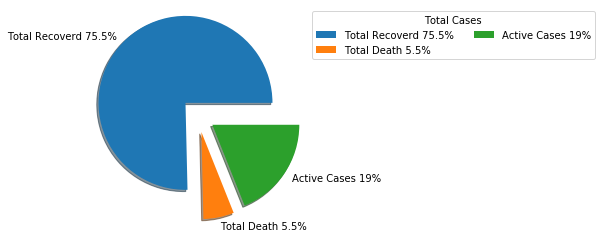

In [54]:
mylabels = ["Total Recoverd 75.5%", "Total Death 5.5%", "Active Cases 19%"]
myexplode = [0.2,0.2,0.2]
plt.pie(sum_data.values(),labels = mylabels,explode = myexplode,shadow = True)
plt.legend( title = "Total Cases",bbox_to_anchor =(1, 1), ncol = 2)
plt.show() 

In [105]:
df['year'] = df['Date'].dt.strftime('%Y')
#another way ==>df['Date'].dt.to_period('Y')
df['year']

0      2020
1      2020
2      2020
3      2020
4      2020
       ... 
515    2021
516    2021
517    2021
518    2021
519    2021
Name: year, Length: 520, dtype: object

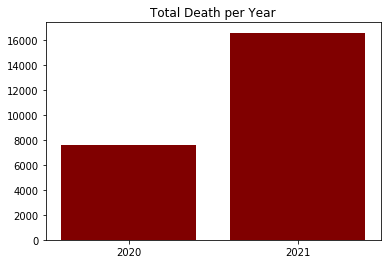

In [106]:
x = df['year']
y = df["Total Death"]

plt.title("Total Death per Year")
plt.bar(x,y,color ='maroon')
plt.show()

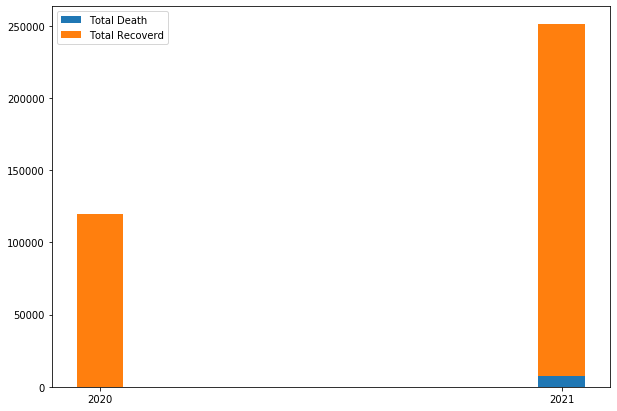

In [107]:
#coz i know the percentage of total death is low , i visualize it with it alone first 
#then i compare it with total Recoverd 
fig = plt.subplots(figsize =(10, 7))
width = 0.1

p1 = plt.bar(df['year'], df["Total Death"], width )
p2 = plt.bar(df['year'], df['Total Recoverd'], width,
             bottom =df["Total Death"])
plt.legend((p1[0], p2[0]), ('Total Death', 'Total Recoverd'))
 
plt.show()

In [109]:
#in the end we should save the new data
df.to_csv('new edition-covid project.csv',index=False)